In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format

In [2]:
df = pd.read_csv('almost.csv', header=0, index_col=0)
# a = df.copy()
# a.index = pd.to_datetime(df.index)
df = df.drop(columns=['diff'])
df.index = pd.to_datetime(df.index)
block1 = df[['separator_speed_rpm_pv','mill_dp_mbar_pv','separator_pwr_kw_pv']]
target_block1 = 'separator_pwr_kw_pv'
block2 = df[['separator_speed_rpm_pv','total_feed_perc_pv','fly_ash_1_perc_pv','fly_ash_2_perc_pv',	'main_fan_speed_rpm_pv'	,'grinding_pressure_bar_pv'	,'mill_injection_water_m3/h_pv','bucket_elv_mtr_pwr_kw_pv','mill_dp_mbar_pv']]
target_block2 = 'mill_dp_mbar_pv'

In [3]:
lookback = 50
horizon = 10
window = lookback + horizon

In [4]:
d = block2

In [5]:
d.head()

,separator_speed_rpm_pv,total_feed_perc_pv,fly_ash_1_perc_pv,fly_ash_2_perc_pv,main_fan_speed_rpm_pv,grinding_pressure_bar_pv,mill_injection_water_m3/h_pv,bucket_elv_mtr_pwr_kw_pv,mill_dp_mbar_pv
date,,,,,,,,,
2019-05-10 11:24:30,735.8900,69.5600,0.0000,0.1500,928.2000,120.0000,2.4600,4.8500,30.5100
2019-05-10 11:25:00,736.6800,69.9000,0.0300,0.1400,928.2000,118.0000,2.4600,4.8800,31.6100
2019-05-10 11:25:30,747.6100,69.7100,0.0000,0.1200,928.2000,117.0000,2.4600,4.8200,33.7100
2019-05-10 11:26:00,747.6100,69.6800,0.0100,0.1400,928.2000,119.0000,2.4600,4.7900,34.6800
2019-05-10 11:26:30,747.5600,70.0000,0.0100,0.0700,928.2000,121.0000,2.4600,4.8100,34.7100


In [6]:

# if you wish to run validation test change its size (valid_size) ,uncomment val_variables in neaxt cells and run validation block

rpm = d['separator_speed_rpm_pv']
ttl_feed = d['total_feed_perc_pv']
fly1 = d['fly_ash_1_perc_pv']
fly2 = d['fly_ash_2_perc_pv']
fan_speed = d['main_fan_speed_rpm_pv']
grind_pres = d['grinding_pressure_bar_pv']
mill_inj = d['mill_injection_water_m3/h_pv']
bucket = d['bucket_elv_mtr_pwr_kw_pv']
dp_bar = d['mill_dp_mbar_pv']

size = len(d)
test_size = int(len(d)*0.3)
valid_size = int(len(d)*0)


tr_rpm = rpm.iloc[:-window-test_size-valid_size]
tr_ttl_feed = ttl_feed.iloc[:-window-test_size-valid_size]
tr_fly1 = fly1.iloc[:-window-test_size-valid_size]
tr_fly2 = fly2.iloc[:-window-test_size-valid_size]
tr_fan_speed = fan_speed.iloc[:-window-test_size-valid_size]
tr_grind_pres = grind_pres.iloc[:-window-test_size-valid_size]
tr_mill_inj = mill_inj.iloc[:-window-test_size-valid_size]
tr_bucket = bucket.iloc[:-window-test_size-valid_size]

tr_dp_bar = dp_bar.iloc[:-window-test_size-valid_size]

#############################################################

# val_rpm = rpm.iloc[-window-test_size-valid_size:-window-test_size]
# val_ttl_feed = ttl_feed.iloc[-window-test_size-valid_size:-window-test_size]
# val_fly1 = fly1.iloc[-window-test_size-valid_size:-window-test_size]
# val_fly2 = fly2.iloc[-window-test_size-valid_size:-window-test_size]
# val_fan_speed = fan_speed.iloc[-window-test_size-valid_size:-window-test_size]
# val_grind_pres = grind_pres.iloc[-window-test_size-valid_size:-window-test_size]
# val_mill_inj = mill_inj.iloc[-window-test_size-valid_size:-window-test_size]
# val_bucket = bucket.iloc[-window-test_size-valid_size:-window-test_size]

# val_dp_bar = dp_bar.iloc[-window-test_size-valid_size:-window-test_size]


##########################################################
# te_pwr = pwr.iloc[-window-test_size:]   # για να μην εχουμε καθολου overlap και leakage 


te_rpm = rpm.iloc[-window-test_size:]
te_ttl_feed = ttl_feed.iloc[-window-test_size:]
te_fly1 = fly1.iloc[-window-test_size:]
te_fly2 = fly2.iloc[-window-test_size:]
te_fan_speed = fan_speed.iloc[-window-test_size:]
te_grind_pres = grind_pres.iloc[-window-test_size:]
te_mill_inj = mill_inj.iloc[-window-test_size:]
te_bucket = bucket.iloc[-window-test_size:]

te_dp_bar = dp_bar.iloc[-window-test_size:]


# val_bucket.shape,  val_mill_inj.shape, val_grind_pres.shape,  val_fan_speed.shape

In [7]:
def split_into_windows(series, lookback, horizon,window):

    windows = []
    for i in range(len(series)-lookback-horizon+1):
        windows.append(series[i:i+lookback+horizon].values)
   
    arr = np.array(windows)

    return arr[:, :lookback], arr[:, lookback:]

In [8]:
x_tr_rpm, y_tr_rpm = split_into_windows(tr_rpm, lookback, horizon,window)
x_tr_ttl_feed,y_tr_ttl_feed = split_into_windows(tr_ttl_feed, lookback, horizon,window)
x_tr_fly1,y_tr_fly1 = split_into_windows(tr_fly1, lookback, horizon,window)
x_tr_fly2,y_tr_fly2 = split_into_windows(tr_fly2, lookback, horizon,window)
x_tr_fan_speed,y_tr_fan_speed = split_into_windows(tr_fan_speed, lookback, horizon,window)
x_tr_grind_pres,y_tr_grind_pres = split_into_windows(tr_grind_pres, lookback, horizon,window)
x_tr_mill_inj,y_tr_mill_inj = split_into_windows(tr_mill_inj, lookback, horizon,window)
x_tr_bucket,y_tr_bucket = split_into_windows(tr_bucket, lookback, horizon,window)

x_tr_dp_bar, y_tr_dp_bar = split_into_windows(tr_dp_bar, lookback, horizon,window)


# x_val_rpm, y_val_rpm = split_into_windows(val_rpm, lookback, horizon,window)
# x_val_ttl_feed,y_val_ttl_feed = split_into_windows(val_ttl_feed, lookback, horizon,window)
# x_val_fly1,y_val_fly1 = split_into_windows(val_fly1, lookback, horizon,window)
# x_val_fly2,y_val_fly2 = split_into_windows(val_fly2, lookback, horizon,window)
# x_val_fan_speed,y_val_fan_speed = split_into_windows(val_fan_speed, lookback, horizon,window)
# x_val_grind_pres,y_val_grind_pres = split_into_windows(val_grind_pres, lookback, horizon,window)
# x_val_mill_inj,y_val_mill_inj = split_into_windows(val_mill_inj, lookback, horizon,window)
# x_val_bucket,y_val_bucket = split_into_windows(val_bucket, lookback, horizon,window)

# x_val_dp_bar, y_val_dp_bar = split_into_windows(val_dp_bar, lookback, horizon,window)


x_te_rpm, y_te_rpm = split_into_windows(te_rpm, lookback, horizon,window)
x_te_ttl_feed,y_te_ttl_feed = split_into_windows(te_ttl_feed, lookback, horizon,window)
x_te_fly1,y_te_fly1 = split_into_windows(te_fly1, lookback, horizon,window)
x_te_fly2,y_te_fly2 = split_into_windows(te_fly2, lookback, horizon,window)
x_te_fan_speed,y_te_fan_speed = split_into_windows(te_fan_speed, lookback, horizon,window)
x_te_grind_pres,y_te_grind_pres = split_into_windows(te_grind_pres, lookback, horizon,window)
x_te_mill_inj,y_te_mill_inj = split_into_windows(te_mill_inj, lookback, horizon,window)
x_te_bucket,y_te_bucket = split_into_windows(te_bucket, lookback, horizon,window)

x_te_dp_bar, y_te_dp_bar = split_into_windows(te_dp_bar, lookback, horizon,window)

In [9]:
print(x_tr_rpm.shape,x_tr_ttl_feed.shape,x_tr_fly1.shape,x_tr_fly2.shape,x_tr_fan_speed.shape,x_tr_grind_pres.shape,x_tr_mill_inj.shape,x_tr_bucket.shape ,x_tr_dp_bar.shape)
# print(x_val_rpm.shape,x_val_ttl_feed.shape,x_val_fly1.shape,x_val_fly2.shape,x_val_fan_speed.shape,x_val_grind_pres.shape,x_val_mill_inj.shape,x_val_bucket.shape ,x_val_dp_bar.shape)
print(x_te_rpm.shape,x_te_ttl_feed.shape,x_te_fly1.shape,x_te_fly2.shape,x_te_fan_speed.shape,x_te_grind_pres.shape,x_te_mill_inj.shape,x_te_bucket.shape ,x_te_dp_bar.shape)

(229885, 50) (229885, 50) (229885, 50) (229885, 50) (229885, 50) (229885, 50) (229885, 50) (229885, 50) (229885, 50)
(98573, 50) (98573, 50) (98573, 50) (98573, 50) (98573, 50) (98573, 50) (98573, 50) (98573, 50) (98573, 50)


In [10]:
# x_tr_rpm.shape, x_val_rpm.shape,x_te_rpm.shape

In [11]:
x_train_block2 = np.concatenate((x_tr_rpm, x_tr_ttl_feed,x_tr_fly1,x_tr_fly2,x_tr_fan_speed,x_tr_grind_pres,x_tr_mill_inj,x_tr_bucket,x_tr_dp_bar), axis=1)
# x_val_block2 = np.concatenate((x_val_rpm, x_val_ttl_feed,x_val_fly1,x_val_fly2,x_val_fan_speed,x_val_grind_pres,x_val_mill_inj,x_val_bucket,x_val_dp_bar),axis=1)
x_test_block2 = np.concatenate((x_te_rpm, x_te_ttl_feed,x_te_fly1,x_te_fly2,x_te_fan_speed,x_te_grind_pres,x_te_mill_inj,x_te_bucket,x_te_dp_bar), axis=1)

### Scale it

In [12]:
def normalize(x):
    mn = x.min(axis=1).reshape(-1, 1)
    mx = x.max(axis=1).reshape(-1, 1)
    x_sc = (x - mn) / (mx - mn)
    return x_sc

#####
##### chose only to scale train set and not test which means columns with predicted y's are as in original dataset 
x_train_block2_sc = normalize(x_train_block2)
# x_val_block2_sc = normalize(x_val_block2)
x_test_block2_sc = normalize(x_test_block2)

In [ ]:
# x_train_block2_sc.shape,x_val_block2_sc.shape

# Validation set

## Linear Models for Mill dp block

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV


lr = LinearRegression()
lr.fit(x_train_block2_sc, y_tr_dp_bar)
lr_preds = lr.predict(x_val_block2_sc)
lr_mse = mean_squared_error(y_val_dp_bar, lr_preds)
lr_mae = mean_absolute_error(y_val_dp_bar, lr_preds)
# param_grid = {"alpha": [0.1, 0.25, 0.5, 0.75, 1, 1.2]}
# lasso = GridSearchCV(Lasso(), param_grid)
lasso = Lasso()
lasso.fit(x_train_block2_sc, y_tr_dp_bar)
lasso_preds = lasso.predict(x_val_block2_sc)
las_mse = mean_squared_error(y_val_dp_bar, lasso_preds)
las_mae = mean_absolute_error(y_val_dp_bar, lasso_preds)

# # param_grid = {"alpha": [0.1, 0.25, 0.5, 0.75, 1, 1.2]}
# # ridge = GridSearchCV(Ridge(), param_grid)
ridge = Ridge()
ridge.fit(x_train_block2_sc, y_tr_dp_bar)
ridge_preds = ridge.predict(x_val_block2_sc)
rid_mse = mean_squared_error(y_val_dp_bar, ridge_preds)
rid_mae = mean_absolute_error(y_val_dp_bar, ridge_preds)

# # # param_grid = {"alpha": [0.1, 0.25, 0.5, 0.75, 1, 1.2], "l1_ratio": [0.1, 0.2, 0.5, 0.7, 0.9]}
# # # eln = GridSearchCV(ElasticNet(), param_grid)
eln = ElasticNet()
eln.fit(x_train_block2_sc, y_tr_dp_bar)
eln_preds = eln.predict(x_val_block2_sc)
eln_mse = mean_squared_error(y_val_dp_bar, eln_preds)
eln_mae = mean_absolute_error(y_val_dp_bar, eln_preds)


print("Linear Models Results :")

print("Linear Regression: ", lr_mse, lr_mae)
print("Lasso: ", las_mse, las_mae)
print("Ridge: ", rid_mse, rid_mae)
print("ElasticNet: ", eln_mse, eln_mae)

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Linear')

r = 1000

plt.plot(range(r), y_val_dp_bar[0:r,0],label='real',lw=1.5)
plt.plot(range(r), lr_preds[0:r,0],label='linear',lw=1.5)
plt.plot(range(r), lasso_preds[0:r,0],label='lasso',lw=1.5)
plt.plot(range(r), ridge_preds[0:r,0],label='ridge',lw=1.5)
plt.plot(range(r), eln_preds[-0:r,0],label='eln',lw=1.5)

plt.legend()

## Tree Models for Mill dp block

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train_block2_sc, y_tr_dp_bar)
dt_preds = dt.predict(x_val_block2_sc)
dt_mse = mean_squared_error(y_val_dp_bar, dt_preds)
dt_mae = mean_absolute_error(y_val_dp_bar, dt_preds)


rf = RandomForestRegressor(n_estimators=5)
rf.fit(x_train_block2_sc, y_tr_dp_bar)
rf_preds = rf.predict(x_val_block2_sc)
rf_mse = mean_squared_error(y_val_dp_bar, rf_preds)
rf_mae = mean_absolute_error(y_val_dp_bar, rf_preds)

print("Decision Tree: ", dt_mse, dt_mae)
print("RandomForest: ", rf_mse, rf_mae)

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Tree Models predictions for Mill\'s dp')

r = 10000

plt.plot(range(r), y_val_dp_bar[0:r,0],label='real',lw=1.5)
plt.plot(range(r), dt_preds[0:r,0],label='Decision Tree',lw=1.5)
plt.plot(range(r), rf_preds[0:r,0],label='Random Forest',lw=1.5)

plt.legend()

# Test set

### Linear Models

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV


lr = LinearRegression()
lr.fit(x_train_block2_sc, y_tr_dp_bar)
lr_preds = lr.predict(x_test_block2_sc)
lr_mse = mean_squared_error(y_te_dp_bar, lr_preds)
lr_mae = mean_absolute_error(y_te_dp_bar, lr_preds)

# param_grid = {"alpha": [0.1, 0.25, 0.5, 0.75, 1, 1.2]}
# lasso = GridSearchCV(Lasso(), param_grid)
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_block2_sc, y_tr_dp_bar)
lasso_preds = lasso.predict(x_test_block2_sc)
las_mse = mean_squared_error(y_te_dp_bar, lasso_preds)
las_mae = mean_absolute_error(y_te_dp_bar, lasso_preds)

# param_grid = {"alpha": [0.1, 0.25, 0.5, 0.75, 1, 1.2]}
# ridge = GridSearchCV(Ridge(), param_grid)
ridge = Ridge(alpha=0.1)
ridge.fit(x_train_block2_sc, y_tr_dp_bar)
ridge_preds = ridge.predict(x_test_block2_sc)
rid_mse = mean_squared_error(y_te_dp_bar, ridge_preds)
rid_mae = mean_absolute_error(y_te_dp_bar, ridge_preds)

# # param_grid = {"alpha": [0.1, 0.25, 0.5, 0.75, 1, 1.2], "l1_ratio": [0.1, 0.2, 0.5, 0.7, 0.9]}
# # eln = GridSearchCV(ElasticNet(), param_grid)
eln = ElasticNet(alpha=0.1,l1_ratio=0.2)
eln.fit(x_train_block2_sc, y_tr_dp_bar)
eln_preds = eln.predict(x_test_block2_sc)
eln_mse = mean_squared_error(y_te_dp_bar, eln_preds)
eln_mae = mean_absolute_error(y_te_dp_bar, eln_preds)


print("Linear Models Results :")

print("Linear Regression: ", lr_mse, lr_mae)
print("Lasso: ", las_mse, las_mae)
print("Ridge: ", rid_mse, rid_mae)
print("ElasticNet: ", eln_mse, eln_mae)

Linear Models Results :
Linear Regression:  4.371741157976716 1.6265436353153482
Lasso:  16.18377816896112 3.1629677900094966
Ridge:  4.626072735217742 1.7056599865299795
ElasticNet:  16.18385861623893 3.162984392532384


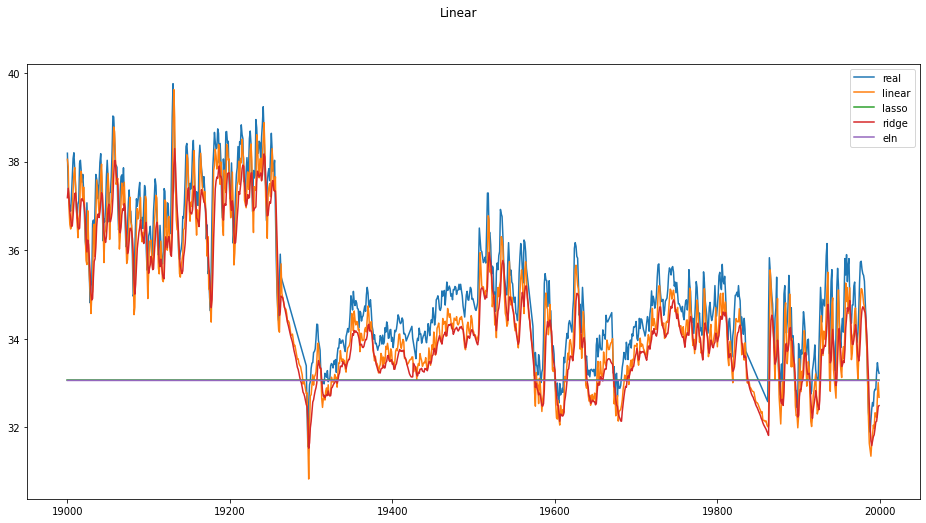

In [14]:
plt.figure(figsize=(16,8))
plt.suptitle('Linear')

# we pick small time frame to be visually easy / we can check any given time space in test set
r = 20000
fr = 19000
plt.plot(range(fr,r), y_te_dp_bar[fr:r,0],label='real',lw=1.5)
plt.plot(range(fr,r), lr_preds[fr:r,0],label='linear',lw=1.5)
plt.plot(range(fr,r), lasso_preds[fr:r,0],label='lasso',lw=1.5)
plt.plot(range(fr,r), ridge_preds[fr:r,0],label='ridge',lw=1.5)
plt.plot(range(fr,r), eln_preds[fr:r,0],label='eln',lw=1.5)

plt.legend()

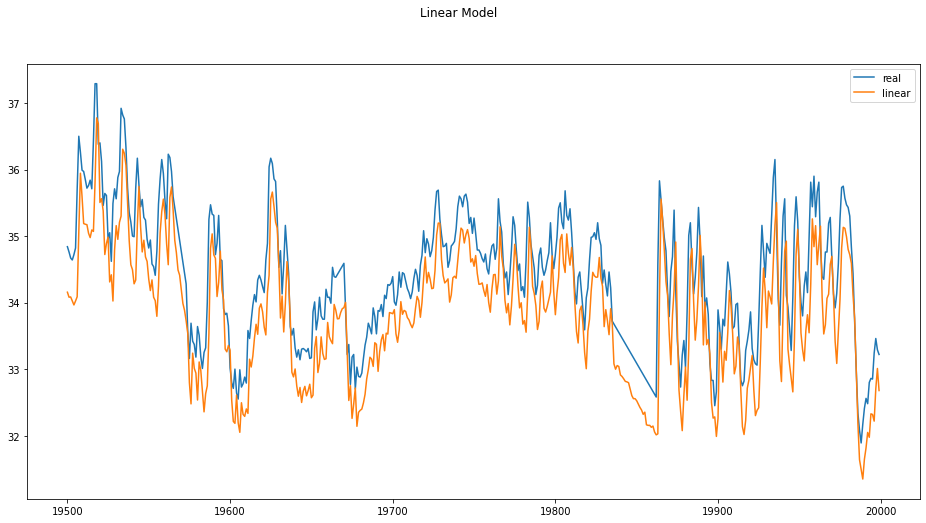

In [15]:
plt.figure(figsize=(16,8))
plt.suptitle('Linear Model')
# we pick small time frame to be visually pleasing
r = 20000
fr = 19500
plt.plot(range(fr,r), y_te_dp_bar[fr:r,0],label='real',lw=1.5)
plt.plot(range(fr,r), lr_preds[fr:r,0],label='linear',lw=1.5)


plt.legend()

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Ridge')
# we pick small time frame to be visually pleasing
r = 20000
fr = 19500
plt.plot(range(fr,r), y_te_dp_bar[fr:r,0],label='real',lw=1.5)

plt.plot(range(fr,r), ridge_preds[fr:r,0],label='ridge',lw=1.5,color='r')

plt.legend()

### Tree Models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

dt = DecisionTreeRegressor(max_depth=2)
dt.fit(x_train_block2_sc, y_tr_dp_bar)
dt_preds = dt.predict(x_test_block2_sc)
dt_mse = mean_squared_error(y_te_dp_bar, dt_preds)
dt_mae = mean_absolute_error(y_te_dp_bar, dt_preds)


rf = RandomForestRegressor(n_estimators=5)
rf.fit(x_train_block2_sc, y_tr_dp_bar)
rf_preds = rf.predict(x_test_block2_sc)
rf_mse = mean_squared_error(y_te_dp_bar, rf_preds)
rf_mae = mean_absolute_error(y_te_dp_bar, rf_preds)

#
###
#   default Gradient boosting not compatible with rolling window dimensions

print("Decision Tree: ", dt_mse, dt_mae)
print("RandomForest: ", rf_mse, rf_mae)

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Tree Models predictions for Mill\'s dp')

r = 20000
fr = 19500
plt.plot(range(fr,r), y_te_dp_bar[fr:r,0],label='real',lw=1.5)
plt.plot(range(fr,r), dt_preds[fr:r,0],label='Decision Tree',lw=1.5)
plt.plot(range(fr,r), rf_preds[fr:r,0],label='Random Forest',lw=1.5)

plt.legend()

In [ ]:
plt.figure(figsize=(16,8))
plt.suptitle('Random Forest')

r = 20000
fr = 19500
plt.plot(range(fr,r), y_te_dp_bar[fr:r,0],label='real',lw=1.5)

plt.plot(range(fr,r), rf_preds[fr:r,0],label='Random Forest',lw=1.5,color='g')

plt.legend()

### Neural Model

In [ ]:
import tensorflow as tf

In [ ]:
inp = tf.keras.layers.Input(shape=(lookback*9,))### lookback * number of features (including target feature ) as this is the size of total x train

hid = tf.keras.layers.Dense(100, activation='relu')(inp)

out = tf.keras.layers.Dense(horizon)(hid)


dense1 = tf.keras.models.Model(inp, out)
dense1.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])

h = dense1.fit(x_train_block2_sc, y_tr_dp_bar, epochs=50)

In [ ]:
_, mae, mse = dense1.evaluate(x_test_block2_sc, y_te_dp_bar)


In [ ]:
nn_preds = dense1.predict(x_test_block2_sc)

plt.figure(figsize=(10,5))
plt.suptitle('Neural Dense100')


r = 20000
fr = 19750

plt.plot(range(fr,r), y_te_dp_bar[fr:r,0],label='real',lw=1.5)
plt.plot(range(fr,r), nn_preds[fr:r,0],label='neural dense',lw=1.5)


plt.legend()

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## kn regressor was not in presentationa s it was last minute addition and takes quiet some time to run 

param_grid={'n_neighbors':[3,5,7,11],'weights':['uniform','distance']}

# knn = GridSearchCV(KNeighborsRegressor(),param_grid,verbose=1)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_block2_sc,y_tr_dp_bar)
knn_preds = knn.predict(x_test_block2_sc)
knn_mse = mean_squared_error(y_te_dp_bar, knn_preds)
knn_mae = mean_absolute_error(y_te_dp_bar, knn_preds)

print("Kneighbors: ", knn_mse, knn_mae)

Kneighbors:  20.622175440706695 3.5342225976817376


In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('ΚΝ Regressor')

r = 20000
fr = 19750

plt.plot(range(fr,r), y_te_dp_bar[fr:r,0],label='real',lw=1.5)
plt.plot(range(fr,r), knn_preds[fr:r,0],label='knn',lw=1.5)

plt.legend()